# Introduction to Scientific Computing with PANDAS

## EPA1341 Advanced System Dynamics

### Philipp Schwarz, Feb 2017

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

# Optional, use a nice style of graphs
plt.style.use('ggplot')

Resources: https://www.udacity.com/course/intro-to-data-analysis--ud170

## Pandas (Ch 5)

Build on top of NumPy. It provides high-level data structures and manipulation tools 
for data analysis. 

  * Labeled axes
  * Arithmetic operations and reductions
  * Flexible handling of missing data
  * Time Series

The main datastructures are: **Series** and **DataFrame**



### Documentation
  * http://pandas.pydata.org/
  * http://pandas.pydata.org/pandas-docs/stable/10min.html
  
  * Google


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

# Optional, use a nice style of graphs
plt.style.use('ggplot')

## Series

A one-dimensional array-like object and an index.

s = Series( [1, 2, 3, 4], index=['A', 'B', 'C', 'D'])


#### Creating a Series

In [3]:
# With a list. Explicitly providing the index
s = pd.Series( [1, 2.423, 3, 4], index=['1', '2', '3', '4'])
s

1    1.000
2    2.423
3    3.000
4    4.000
dtype: float64

In [5]:
# With a numpy array.
s = pd.Series( np.random.randn(10) )
s

0   -0.056482
1   -0.479534
2   -0.328305
3    0.471880
4   -1.024064
5   -0.843644
6    0.753303
7    0.217190
8    0.130201
9    2.238333
dtype: float64

In [11]:
# With a dict
cities = { 'Amsterdam' : 8324,  'Utrecht' : 2000, 'The Hague' : 3000, 'Rotterdam' : 4000}
s = pd.Series( cities )
s

Amsterdam    8324
Rotterdam    4000
The Hague    3000
Utrecht      2000
dtype: int64

In [6]:
# Name the index and the series
s.name = 'Code'
s.index.name = 'Cities'
s

Cities
Amsterdam    1000
Rotterdam    4000
The Hague    3000
Utrecht      2000
Name: Code, dtype: int64

### Accessing Series

In [7]:
# Accessing the index
s.index

Index(['Amsterdam', 'Rotterdam', 'The Hague', 'Utrecht'], dtype='object', name='Cities')

In [7]:
# Accessing the values
s.values.tolist()

[[32, 4], 4000, 3000, 2000]

In [9]:
# indexing on position. Result is a value.
s[1]

4000

In [8]:
# slicing on position. Result is another Series
s[1:4]

Rotterdam    4000
The Hague    3000
Utrecht      2000
dtype: object

In [11]:
# indexing on label (index)
s['Rotterdam']

4000

In [12]:
# Slicing on label
# Note, when slicing on label the slice is INCLUDING the end.
s[:'Rotterdam']

Cities
Amsterdam    1000
Rotterdam    4000
Name: Code, dtype: int64

In [13]:
# Fancy indexing
s[ ['Utrecht', 'Amsterdam'] ]

Cities
Utrecht      2000
Amsterdam    1000
Name: Code, dtype: int64

In [14]:
# Check for values
s.isin([1000, 1500, 2500, 3000, 'Monkey'])

Cities
Amsterdam     True
Rotterdam    False
The Hague     True
Utrecht      False
Name: Code, dtype: bool

In [15]:
# Check for index 
'Utrecht' in s, 'Maastricht' in s

(True, False)

### Filtering and Functions

In [12]:
# Filtering and NumPy universal functions work as aspected
s = s[ s >= 2500 ]

In [13]:
s

Amsterdam    8324
Rotterdam    4000
The Hague    3000
dtype: int64

In [14]:
s * 2.5

Amsterdam    20810.0
Rotterdam    10000.0
The Hague     7500.0
dtype: float64

In [15]:
np.log( s )

Amsterdam    9.026898
Rotterdam    8.294050
The Hague    8.006368
dtype: float64

### NaN values

NaN values (Not a Number) represent missing values or NA values in the Pandas library.  


In [16]:
s2 = pd.Series( [ 1500, 500, np.nan, 10], index=['Maastricht', 'Groningen', 'Assen', 'Haarlem'])
s2

Maastricht    1500.0
Groningen      500.0
Assen            NaN
Haarlem         10.0
dtype: float64

In [17]:
# Check for NaN values 
#pd.isnull(s2) 

s2[s2.isnull() ]   # As an object method also works

#pd.notnull(s2)

Assen   NaN
dtype: float64

In [18]:
s2.fillna(0)

Maastricht    1500.0
Groningen      500.0
Assen            0.0
Haarlem         10.0
dtype: float64

### Assignment

In [21]:
# Change a value
s2['Haarlem'] = 3500
s2

Maastricht    1500.0
Groningen      500.0
Assen            NaN
Haarlem       3500.0
dtype: float64

In [19]:
# Add a new value
s2['Utrecht'] = 222
s2['Amsterdam'] = 333
s2['Rotterdam'] = 444
s2

Maastricht    1500.0
Groningen      500.0
Assen            NaN
Haarlem         10.0
Utrecht        222.0
Amsterdam      333.0
Rotterdam      444.0
dtype: float64

In [20]:
# Addition is done based on index. NaN if no matching index found.
s + s2

Amsterdam     8657.0
Assen            NaN
Groningen        NaN
Haarlem          NaN
Maastricht       NaN
Rotterdam     4444.0
The Hague        NaN
Utrecht          NaN
dtype: float64

## DataFrame

A DataFrame is a table/spreadsheet with rows and columns that can contain different types of data.

### Creation

In [21]:
# Using a matrix
df = pd.DataFrame( np.random.random( size=(3,4) ), 
                      columns=list("ABCD"), 
                      index=['first', 'second','third'] )
df

,A,B,C,D
first,0.081145,0.320865,0.046622,0.447843
second,0.147903,0.298793,0.798606,0.441714
third,0.022115,0.477146,0.401021,0.565433


In [22]:
# Using a dictionary
d = { 'A' : range(30,37,3),
      'B' : np.random.random(3),
      'C' : [ random.random() for _ in range(3) ],
      'D' : ['John', 'Mary', 'Jane']
    }
df = pd.DataFrame( d, index=['first','second','third'] )
df

,A,B,C,D
first,30,0.037210,0.028664,John
second,33,0.748722,0.284613,Mary
third,36,0.955850,0.290759,Jane


In [23]:
# Generic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, first to third
Data columns (total 4 columns):
A    3 non-null int32
B    3 non-null float64
C    3 non-null float64
D    3 non-null object
dtypes: float64(2), int32(1), object(1)
memory usage: 108.0+ bytes


In [27]:
# Statistics on the numerical data
df.describe()

,A,B,C
count,3.0,3.000000,3.000000
mean,33.0,0.253500,0.282000
std,3.0,0.226995,0.276338
min,30.0,0.058800,0.099388
25%,31.5,0.128839,0.123042
50%,33.0,0.198877,0.146696
75%,34.5,0.350849,0.373306
max,36.0,0.502822,0.599917


In [28]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [29]:
df.index

Index(['first', 'second', 'third'], dtype='object')

In [30]:
df.values

array([[30, 0.5028220617250452, 0.14669612241553764, 'John'],
       [33, 0.058800384839646, 0.5999168343504829, 'Mary'],
       [36, 0.19887692348389663, 0.09938847187027777, 'Jane']], dtype=object)


### Accessing

In [24]:
# Selecting column, result is Series
type(df['B df'])

pandas.core.series.Series

In [32]:
# Alternative, result is Series
df.B df

first     0.502822
second    0.058800
third     0.198877
Name: B, dtype: float64

In [25]:
# Fancy indexing, result is dataframe
df[ ['D','B'] ]

#df[ ['B'] ]

,D,B
first,John,0.037210
second,Mary,0.748722
third,Jane,0.955850


In [34]:
# Selecting rows, result is series
df.ix[1]

A           33
B    0.0588004
C     0.599917
D         Mary
Name: second, dtype: object

In [35]:
# slicing, result is dataframe
df.ix[ 1:2 ]

,A,B,C,D
second,33,0.0588,0.599917,Mary


In [36]:
# Selecting elements [row, column]
df.ix[1,2]

0.59991683435048293

In [37]:
# With slicing
df.ix[1:3, :3 ]

,A,B,C
second,33,0.058800,0.599917
third,36,0.198877,0.099388


In [38]:
# Fancy indexing, using positions
# Warning: watch out if labels are integers too! 
# Use df.iloc and df.loc to use positions or labels explicitly.
# df.ix does a smart guess, but prioritizes labels.
df.ix[:2, [3,0,2]]

,D,A,C
first,John,30,0.146696
second,Mary,33,0.599917


In [39]:
# Fancy indexing, using labels!
df.ix[ :'second', ['D', 'A', 'C'] ]

,D,A,C
first,John,30,0.146696
second,Mary,33,0.599917


### Filtering

In [40]:
# Let's print df again
df

,A,B,C,D
first,30,0.502822,0.146696,John
second,33,0.058800,0.599917,Mary
third,36,0.198877,0.099388,Jane


In [41]:
# Selecting values. Not matching values are replaced by NaN
df[df < 0.5]

,A,B,C,D
first,NaN,NaN,0.146696,John
second,NaN,0.058800,NaN,Mary
third,NaN,0.198877,0.099388,Jane


In [42]:
# Selecting rows based on a Series of booleans
df[df.D == 'Mary']

,A,B,C,D
second,33,0.0588,0.599917,Mary


### Assignment

In [43]:
# Changing values
df.ix['first','A'] = 28
df

,A,B,C,D
first,28,0.502822,0.146696,John
second,33,0.058800,0.599917,Mary
third,36,0.198877,0.099388,Jane


In [44]:
# Adding a new column
df['E'] = 500
df['F'] = np.sqrt(df['A'])
df['G'] = df['B'] / df['C']
df

,A,B,C,D,E,F,G
first,28,0.502822,0.146696,John,500,5.291503,3.427644
second,33,0.058800,0.599917,Mary,500,5.744563,0.098014
third,36,0.198877,0.099388,Jane,500,6.000000,2.001006


In [45]:
# Dropping entries. Drop a row
df.drop(['second'], axis=0)

,A,B,C,D,E,F,G
first,28,0.502822,0.146696,John,500,5.291503,3.427644
third,36,0.198877,0.099388,Jane,500,6.000000,2.001006


In [46]:
# Drop a column (or 2)
df.drop( ['B','F'], axis=1)

,A,C,D,E,G
first,28,0.146696,John,500,3.427644
second,33,0.599917,Mary,500,0.098014
third,36,0.099388,Jane,500,2.001006


### Arithmetic

NumPy universal functions still work as expected. Aggregation as well.

In [47]:
df1 = pd.DataFrame( np.arange(9).reshape(3,3), columns=list("abc"),
                  index=["John","Mary","Peter"])
df2 = pd.DataFrame( np.arange(12).reshape(4,3), columns=list("acd"),
                  index=["Anne", "John", "Mary", "Zach"])


In [48]:
df1

,a,b,c
John,0,1,2
Mary,3,4,5
Peter,6,7,8


In [49]:
df2

,a,c,d
Anne,0,1,2
John,3,4,5
Mary,6,7,8
Zach,9,10,11


In [50]:
# Addition matches both index and column, NaN for all other index, column combinations
df1 + df2

,a,b,c,d
Anne,NaN,NaN,NaN,NaN
John,3.0,NaN,6.0,NaN
Mary,9.0,NaN,12.0,NaN
Peter,NaN,NaN,NaN,NaN
Zach,NaN,NaN,NaN,NaN


In [51]:
# Universal functions, element wise

np.sqrt(df2)

,a,c,d
Anne,0.000000,1.000000,1.414214
John,1.732051,2.000000,2.236068
Mary,2.449490,2.645751,2.828427
Zach,3.000000,3.162278,3.316625


In [52]:
# Aggregation, sum per column
df2.sum()

a    18
c    22
d    26
dtype: int64

In [53]:
# sum per row
df2.sum(axis=1)

Anne     3
John    12
Mary    21
Zach    30
dtype: int64

In [54]:
# Cumulative sums
df2.cumsum(axis=0)

,a,c,d
Anne,0,1,2
John,3,5,7
Mary,9,12,15
Zach,18,22,26


Other functions that are available include:
  * count - count non-NA values
  * min/max
  * argmin, argmax - location of min/max value (Series)
  * idxmin, idxmax - index values of min/max (DataFrame)
  * sum, mean, var, std
  * cumsum, cumprod, cummin, cummax - cumulative

## Sorting and Rank

Sorting can be done on rows (index) and columns.

  * sort_index
  * sort_values
  

In [55]:
df

,A,B,C,D,E,F,G
first,28,0.502822,0.146696,John,500,5.291503,3.427644
second,33,0.058800,0.599917,Mary,500,5.744563,0.098014
third,36,0.198877,0.099388,Jane,500,6.000000,2.001006


In [56]:
# Sort rows
df.sort_index(ascending=False)

,A,B,C,D,E,F,G
third,36,0.198877,0.099388,Jane,500,6.000000,2.001006
second,33,0.058800,0.599917,Mary,500,5.744563,0.098014
first,28,0.502822,0.146696,John,500,5.291503,3.427644


In [57]:
# Sort rows, based on the values in a column
df.sort_values( by='B', ascending=True )

,A,B,C,D,E,F,G
second,33,0.058800,0.599917,Mary,500,5.744563,0.098014
third,36,0.198877,0.099388,Jane,500,6.000000,2.001006
first,28,0.502822,0.146696,John,500,5.291503,3.427644


In [58]:
# Sort columns
df.sort_index(ascending=False, axis=1)

,G,F,E,D,C,B,A
first,3.427644,5.291503,500,John,0.146696,0.502822,28
second,0.098014,5.744563,500,Mary,0.599917,0.058800,33
third,2.001006,6.000000,500,Jane,0.099388,0.198877,36


### Handling missing data

Missing data is represented as NaN. There are ways to detect and deal with these
values.
  * isnull() / notnull() - test for NaN
  * dropna() - leave out NaN
  * fillna() - replace NaN with a value

In [59]:
from numpy import NaN as NA

d = pd.Series( [1, NA, 3.5, NA, 7])

d.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [60]:
d[d.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [61]:
# dropna on dataframes drops entire rows/columns
df = pd.DataFrame( np.random.rand(3,4) )
df.ix[:,2] = NA
df.ix[0,2:] = NA
df.ix[2,0] = NA
df

,0,1,2,3
0,0.400987,0.338926,NaN,NaN
1,0.469455,0.841674,NaN,0.970510
2,NaN,0.299822,NaN,0.341086


In [62]:
# Drop entire row/column (axis) / how="all" or "any"
df.dropna(axis=1, how="all")

,0,1,3
0,0.400987,0.338926,NaN
1,0.469455,0.841674,0.970510
2,NaN,0.299822,0.341086


In [63]:
# Filling in data

df.fillna( 1000 )

,0,1,2,3
0,0.400987,0.338926,1000.0,1000.000000
1,0.469455,0.841674,1000.0,0.970510
2,1000.000000,0.299822,1000.0,0.341086


In [64]:
# Or fill in with data from the dataframe
# Fill data per row or column (axis) 
# and forward / backward fill (method)
df.fillna( axis=1, method="bfill")

,0,1,2,3
0,0.400987,0.338926,NaN,NaN
1,0.469455,0.841674,0.970510,0.970510
2,0.299822,0.299822,0.341086,0.341086


In [65]:
# Use a mean value (of each column)
df.fillna(df.mean())

,0,1,2,3
0,0.400987,0.338926,NaN,0.655798
1,0.469455,0.841674,NaN,0.970510
2,0.435221,0.299822,NaN,0.341086


## Data Reading / Writing (Ch 6)

There are easy ways to read/write dataframes. Read the manual for all the possible
arguments that you can provide to easy parsing the data.

  * read_csv
  * read_excel
  * read_clipboard
  
  * to_csv
  * to_excel
  * to_clipboard

In [66]:
# On Windows: !type 'csv_example.csv'
!cat 'csv_example.csv'

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [67]:
# Also supports URLs directly.
df = pd.read_csv('csv_example.csv', delimiter=',', skipinitialspace=True)
df

,Name,City,Age
0,John,Amsterdam,30
1,Anne,Utrecht,25
2,Peter,Maastricht,45
3,Mary,Rotterdam,36
4,Zach,Groningen,26
5,Bob,Utrecht,18


## Data Wrangling (Ch 7)

Combining and merging data sets

  * merge
  * concat
  

In [68]:
city_names = ['Amsterdam','Utrecht','Haarlem','Maastricht',
              'Rotterdam','Groningen','Assen','The Hague']
province_names = ['NH','UT','NH','LI','ZH','GR','DR','ZH']


cities = pd.DataFrame( { 'City':city_names, 'Province':province_names })
cities

,City,Province
0,Amsterdam,NH
1,Utrecht,UT
2,Haarlem,NH
3,Maastricht,LI
4,Rotterdam,ZH
5,Groningen,GR
6,Assen,DR
7,The Hague,ZH


In [69]:
df2 = pd.DataFrame( {'Name':['Alice', 'Steven', 'Karen'],
                     'City':['Haarlem','Assen','Rotterdam'],
                     'Age':[23,33,40]}, columns=["Name","City","Age"])
df2

,Name,City,Age
0,Alice,Haarlem,23
1,Steven,Assen,33
2,Karen,Rotterdam,40


In [70]:
# Concat will concatenate 2 dataframes
# Watch the index!
people = pd.concat( [df,df2], ignore_index=True, axis=0)
people

,Name,City,Age
0,John,Amsterdam,30
1,Anne,Utrecht,25
2,Peter,Maastricht,45
3,Mary,Rotterdam,36
4,Zach,Groningen,26
5,Bob,Utrecht,18
6,Alice,Haarlem,23
7,Steven,Assen,33
8,Karen,Rotterdam,40


Merge will combine 2 dataframes by combining rows from both dataframes if they match
on a certain column value (or set of column values).

What happens to rows in either dataframe if no matching row is found depends on the "how" argument:
  * inner: only rows that match will be in the result (default)
  * outer: rows in either dataframe that don't match are also included in the result (with NaN)
  * left: rows in the left dataframe that don't match are also included in the result
  * right: rows in the right dataframe that don't match are also included in the result


In [71]:
# We can combine people and cities... merge
# on - what columns should match?
# how - what should be done with non-matching entries? (left, right, outer, inner)
pd.merge( people, cities, on="City", how="inner" )


,Name,City,Age,Province
0,John,Amsterdam,30,NH
1,Anne,Utrecht,25,UT
2,Bob,Utrecht,18,UT
3,Peter,Maastricht,45,LI
4,Mary,Rotterdam,36,ZH
5,Karen,Rotterdam,40,ZH
6,Zach,Groningen,26,GR
7,Alice,Haarlem,23,NH
8,Steven,Assen,33,DR


## Plotting (Ch 8)

matplotlib can create plots. However, Series and DataFrames provide shortcuts
to calling matplotlib.

  * Series.plot
  * Dataframe.plot
  
Any arguments are passed through to matplotlib.


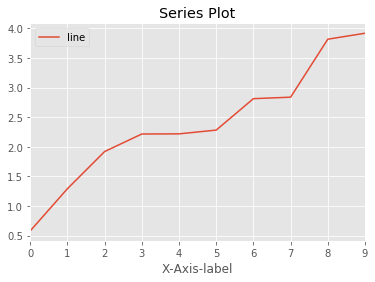

In [72]:
s = pd.Series( np.random.rand(10).cumsum() )
s.index.name="X-Axis-label"
s.plot(kind="line", title="Series Plot", label="line", legend=True )

In [73]:
# Create a random dataframe to test with
df = pd.DataFrame( np.random.randn(10,4).cumsum(axis=0), columns=list("ABCD"),
    index=np.arange(0,100,10))
df.index.name="Index Name"
df.columns.name="Column Names"
df

Column Names,A,B,C,D
Index Name,,,,
0,-0.277132,1.622261,0.266663,0.256330
10,0.773031,1.984252,-0.965572,0.838083
20,0.907624,1.960571,-0.489330,1.402876
30,1.998059,4.621441,-0.197663,1.170443
40,2.568558,3.716339,-0.508828,2.351296
50,3.868183,4.005405,0.837007,1.849780
60,4.672623,4.408270,1.881386,2.015442
70,5.274628,5.200597,-0.483123,2.255120
80,5.043719,4.198476,0.453307,4.767578


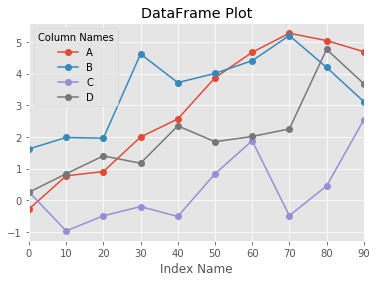

In [74]:
df.plot(kind="line", style="-o", title="DataFrame Plot")

## Example: students and grades



In [75]:
# Read a file with student names and student numbers
student = pd.read_csv("students.csv")
student

,Name,Studnr
0,John,203588
1,Mary,190998
2,Jane,876189
3,Anne,486857
4,Peter,812017
5,Bob,193971
6,Carol,361935
7,Zach,360451
8,David,180586
9,Iris,298910


In [76]:
# Read in some student numbers, courses and grades (4 tests)
result = pd.read_csv("grades.csv")
result

,Studnr,Course,Test1,Test2,Test3,Test4
0,298910.0,EPA101,5.1,9.1,8.7,6.8
1,361935.0,EPA101,6.7,6.5,NaN,7.4
2,486857.0,EPA101,9.2,NaN,9.0,6.9
3,876189.0,EPA101,4.9,6.3,9.9,6.9
4,883497.0,EPA101,9.3,8.5,4.4,NaN
5,812017.0,EPA101,8.4,5.7,8.1,4.7
6,193971.0,EPA101,9.1,NaN,5.7,8.2
7,975528.0,EPA101,9.2,4.2,6.9,7.4
8,817299.0,EPA101,4.5,5.6,6.0,8.9
9,562673.0,EPA101,8.1,9.0,5.1,4.1


In [77]:
# Show results for one student
result[result.Studnr==360451]

,Studnr,Course,Test1,Test2,Test3,Test4
11,360451.0,EPA101,4.1,5.1,NaN,5.2
17,360451.0,EPA202,6.1,5.9,4.1,7.6
29,360451.0,EPA303,9.6,8.9,NaN,NaN


In [78]:
# Merge the 2 tables of student names and grades together
grades=pd.merge(student,result,on="Studnr",how="left")
grades

,Name,Studnr,Course,Test1,Test2,Test3,Test4
0,John,203588,EPA101,NaN,7.3,7.2,7.4
1,John,203588,EPA202,NaN,NaN,9.1,8.9
2,John,203588,EPA303,7.9,4.6,6.2,9.7
3,Mary,190998,EPA101,7.8,9.7,4.8,8.5
4,Mary,190998,EPA202,NaN,5.7,7.6,6.5
5,Mary,190998,EPA303,9.2,NaN,8.9,6.9
6,Jane,876189,EPA101,4.9,6.3,9.9,6.9
7,Jane,876189,EPA202,9.6,6.9,6.9,NaN
8,Jane,876189,EPA303,5.1,4.6,4.3,5.6
9,Anne,486857,EPA101,9.2,NaN,9.0,6.9


In [79]:
# Add a column with the mean of the tests
grades['Final'] = grades.ix[:,'Test1':'Test4'].mean(axis=1)
grades.head(10)

,Name,Studnr,Course,Test1,Test2,Test3,Test4,Final
0,John,203588,EPA101,NaN,7.3,7.2,7.4,7.300000
1,John,203588,EPA202,NaN,NaN,9.1,8.9,9.000000
2,John,203588,EPA303,7.9,4.6,6.2,9.7,7.100000
3,Mary,190998,EPA101,7.8,9.7,4.8,8.5,7.700000
4,Mary,190998,EPA202,NaN,5.7,7.6,6.5,6.600000
5,Mary,190998,EPA303,9.2,NaN,8.9,6.9,8.333333
6,Jane,876189,EPA101,4.9,6.3,9.9,6.9,7.000000
7,Jane,876189,EPA202,9.6,6.9,6.9,NaN,7.800000
8,Jane,876189,EPA303,5.1,4.6,4.3,5.6,4.900000
9,Anne,486857,EPA101,9.2,NaN,9.0,6.9,8.366667


In [80]:
# Create extra columne 'Passed'
grades['Passed'] = np.where( grades['Final']>=5.8, True, False)
grades['Passed2'] = grades['Final']>=5.8
grades.head(10)

,Name,Studnr,Course,Test1,Test2,Test3,Test4,Final,Passed,Passed2
0,John,203588,EPA101,NaN,7.3,7.2,7.4,7.300000,True,True
1,John,203588,EPA202,NaN,NaN,9.1,8.9,9.000000,True,True
2,John,203588,EPA303,7.9,4.6,6.2,9.7,7.100000,True,True
3,Mary,190998,EPA101,7.8,9.7,4.8,8.5,7.700000,True,True
4,Mary,190998,EPA202,NaN,5.7,7.6,6.5,6.600000,True,True
5,Mary,190998,EPA303,9.2,NaN,8.9,6.9,8.333333,True,True
6,Jane,876189,EPA101,4.9,6.3,9.9,6.9,7.000000,True,True
7,Jane,876189,EPA202,9.6,6.9,6.9,NaN,7.800000,True,True
8,Jane,876189,EPA303,5.1,4.6,4.3,5.6,4.900000,False,False
9,Anne,486857,EPA101,9.2,NaN,9.0,6.9,8.366667,True,True


In [81]:
# How many passed/failed?
pd.value_counts(grades['Passed'])

True     37
False     5
Name: Passed, dtype: int64

In [82]:
grades['Final'].mean()

6.976984126984128

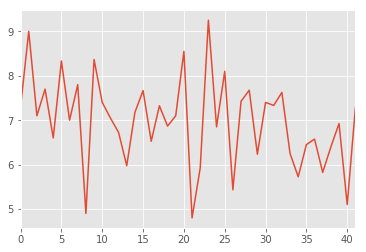

In [83]:
grades['Final'].plot()

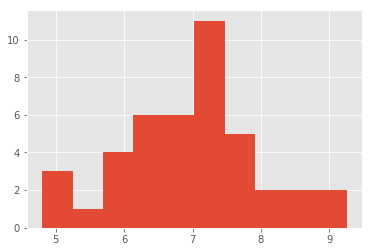

In [84]:
# Histogram of grades
grades['Final'].hist()

## Time Series (Ch 10)

Working with dates and times in Pandas and Python. 

Used for:
    * Timestamps - specific instant in time
    * Intervals - period between start and end timestamps.
    
Examples: Series with timestamps as index.

Data types used:

    pandas.datetime
    
    datetime.datetime
    
    pandas.Timestamp     - more or less equivalent to datetime
    
A datetime is (Year, Month, Day, Hour, Minute, Second, Millisecond)

    date.year                     date.hour              date.millisecond
    date.month                    date.minute
    date.day                      date.second



### Creating a Datetimes

In [85]:
# Get the current date and time
now = pd.datetime.now()
now

datetime.datetime(2017, 2, 16, 13, 42, 56, 983502)

In [86]:
# Parse it from a string using a specified format
pd.datetime.strptime( "2016-10-6", "%Y-%d-%m")   # June 10, 2016

datetime.datetime(2016, 6, 10, 0, 0)

Possible format strings:

    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent of either AM or PM.
    
    and more ... 

E.g. ```"%Y/%b/%d - %H:%M:%S"``` will parse ```"2016/Apr/16 - 23:30:50"```

### Date ranges

Create a date range, for certain period and/or with particular frequency.

    pd.date_range( start="2016-1-1", end="2017-1-1", freq="W" )
    pd.date_range( start="2016-1-1", periods=20, freq="BM" )

Offset aliases strings for pandas.date_range( start, end, periods, freq )

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases

  * H - hour (4H = every 4 hours)
  * min - minute
  * D - day (2D = every 2 days)
  * M - End of month
  * MS - Start of month
  * W - Weekly (default: Sunday)
  * W-Mon - Weekly every monday (2W-Tue - every second Tuesday), similar for Tue, Wed, Thu, Fri, Sat, Sun.
  * WOM-1Mon - Week of month (WOM-2Wed - every second wednesday of the month), similar for Tue, Wed, Thu, Fri, Sat, Sun
  * B - Business day frequency 
  * BM - Business end of Month
  * BMS - Business start of Month
  * Q - Quarter End
  * Q - Quarter Start
  * ... and more


In [87]:
#pd.date_range( start="2016-1-1", end="2017-1-1", freq="W" )
dr=pd.date_range( start="2016-1-1", periods=20, freq="WOM-2Thu" )
dr

DatetimeIndex(['2016-01-14', '2016-02-11', '2016-03-10', '2016-04-14',
               '2016-05-12', '2016-06-09', '2016-07-14', '2016-08-11',
               '2016-09-08', '2016-10-13', '2016-11-10', '2016-12-08',
               '2017-01-12', '2017-02-09', '2017-03-09', '2017-04-13',
               '2017-05-11', '2017-06-08', '2017-07-13', '2017-08-10'],
              dtype='datetime64[ns]', freq='WOM-2THU')

### Slicing, Indexing TimeSeries

You can access TimeSeries as usual, but can pass dates in any form.

   * ts[0:10]
   * ts['1-1-2016':'8-1-2016']  
   * ts['20160101']

In [88]:
# Let's create a big time series

ts = pd.Series( np.random.random(1000), index=pd.date_range('1/1/2016', periods=1000))
ts.head(10)

2016-01-01    0.595279
2016-01-02    0.490056
2016-01-03    0.741655
2016-01-04    0.086796
2016-01-05    0.755716
2016-01-06    0.026172
2016-01-07    0.213961
2016-01-08    0.476858
2016-01-09    0.980886
2016-01-10    0.905778
Freq: D, dtype: float64

In [89]:
# Standard slicing
ts[0:5]

2016-01-01    0.595279
2016-01-02    0.490056
2016-01-03    0.741655
2016-01-04    0.086796
2016-01-05    0.755716
Freq: D, dtype: float64

In [90]:
# Selecting on date
ts['20160101']

0.59527904398351261

In [91]:
ts['01/01/2016']

0.59527904398351261

In [92]:
# Select by month
ts['2017-5']

2017-05-01    0.570041
2017-05-02    0.391717
2017-05-03    0.488587
2017-05-04    0.899459
2017-05-05    0.265166
2017-05-06    0.542195
2017-05-07    0.917402
2017-05-08    0.743899
2017-05-09    0.160839
2017-05-10    0.188446
2017-05-11    0.829103
2017-05-12    0.083952
2017-05-13    0.707566
2017-05-14    0.770143
2017-05-15    0.731641
2017-05-16    0.346835
2017-05-17    0.496560
2017-05-18    0.388061
2017-05-19    0.958094
2017-05-20    0.324870
2017-05-21    0.629134
2017-05-22    0.965190
2017-05-23    0.817537
2017-05-24    0.890255
2017-05-25    0.296492
2017-05-26    0.317615
2017-05-27    0.184298
2017-05-28    0.125485
2017-05-29    0.626851
2017-05-30    0.621664
2017-05-31    0.135359
Freq: D, dtype: float64

In [93]:
# Select a year
ts['2016']

2016-01-01    0.595279
2016-01-02    0.490056
2016-01-03    0.741655
2016-01-04    0.086796
2016-01-05    0.755716
2016-01-06    0.026172
2016-01-07    0.213961
2016-01-08    0.476858
2016-01-09    0.980886
2016-01-10    0.905778
2016-01-11    0.301915
2016-01-12    0.185655
2016-01-13    0.045625
2016-01-14    0.780927
2016-01-15    0.993273
2016-01-16    0.880832
2016-01-17    0.970070
2016-01-18    0.013869
2016-01-19    0.704042
2016-01-20    0.065152
2016-01-21    0.530789
2016-01-22    0.454458
2016-01-23    0.016616
2016-01-24    0.258141
2016-01-25    0.167477
2016-01-26    0.204084
2016-01-27    0.143021
2016-01-28    0.778222
2016-01-29    0.237505
2016-01-30    0.072860
                ...   
2016-12-02    0.794601
2016-12-03    0.238371
2016-12-04    0.216759
2016-12-05    0.365459
2016-12-06    0.013481
2016-12-07    0.379941
2016-12-08    0.834966
2016-12-09    0.572853
2016-12-10    0.176522
2016-12-11    0.674396
2016-12-12    0.950041
2016-12-13    0.405619
2016-12-14 

### Resampling

Suppose you need the timestamps at another interval (resample). Resampling requires two
things:
  * At what new interval do you want to sample? (upsampling / downsampling)
  * How to calculate the new value based on the available values (sum, max, min, mean, ...)?
  
 
    ts.resample('7D').max()    # Resample to every 7 days, take maximum value available.
    
The frequency uses the same list as for ```daterange```.

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases


In [94]:
# Make a Timeseries, representing observations every 5 minutes.
ts = pd.Series( np.random.randint(0,20,100), 
               index=pd.date_range( '1/1/2016', periods=100, freq="5min") )
ts.head(10)

2016-01-01 00:00:00    15
2016-01-01 00:05:00     3
2016-01-01 00:10:00     9
2016-01-01 00:15:00     1
2016-01-01 00:20:00     7
2016-01-01 00:25:00     2
2016-01-01 00:30:00    13
2016-01-01 00:35:00     2
2016-01-01 00:40:00     2
2016-01-01 00:45:00     4
Freq: 5T, dtype: int32

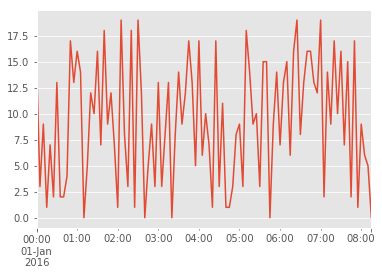

In [95]:
# Let's plot them
ts.plot()

In [96]:
# Let's say you actually want a resolution of hours only. Sum all the observations.
ts.resample('1H').sum()

2016-01-01 00:00:00     88
2016-01-01 01:00:00    126
2016-01-01 02:00:00     98
2016-01-01 03:00:00    115
2016-01-01 04:00:00     85
2016-01-01 05:00:00    119
2016-01-01 06:00:00    154
2016-01-01 07:00:00    129
2016-01-01 08:00:00     20
Freq: H, dtype: int32

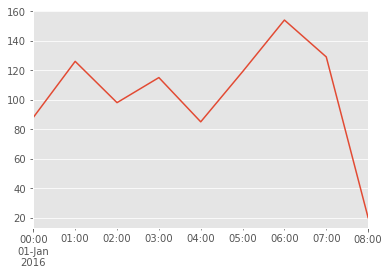

In [97]:
ts.resample('1H').sum().plot()

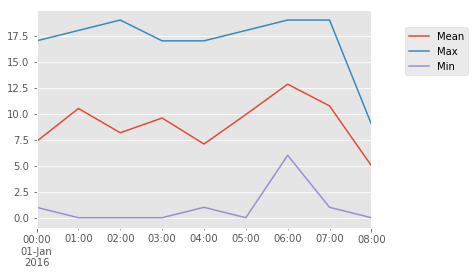

In [98]:
# We could have taken the mean value or the max...
ts.resample('1H').mean().plot(label="Mean")
ts.resample('1H').max().plot(label="Max")
ts.resample('1H').min().plot(label="Min")
plt.legend(loc=(1.1,0.7))

## Apply, applymap, map (Ch. 9)

You can apply a function on the values in a Series or Dataframe. We have
seen many uses of that: sum, mean, log, etc.

There is a general way to use this. You can even write your own function that you want to apply.

### Series

    series.map( func / dictionary / series )
  
    series.apply( func )
  
  
### Dataframes

    dataframe.apply( func, axis )    # Works on whole rows or columns at a time
  
    dataframe.applymap( func )       # Works per element

In [99]:
# Example, create a simple Series
s = pd.Series( np.arange(1,6), index=list("ABCDE") )
s

A    1
B    2
C    3
D    4
E    5
dtype: int32

In [100]:
# Apply the log function to each of the values
# Note, alternative for this is np.log(s)
s.map( np.log )

A    0.000000
B    0.693147
C    1.098612
D    1.386294
E    1.609438
dtype: float64

In [101]:
# Our own function
def f(x):
    """Calculate some function and round of to two decimals"""
    return float("%.2f" % (x*(x+1)/(x+2)))

f(2)

1.5

In [102]:
s.map( f )

A    0.67
B    1.50
C    2.40
D    3.33
E    4.29
dtype: float64

In [103]:
s.apply(f)

A    0.67
B    1.50
C    2.40
D    3.33
E    4.29
dtype: float64

In [104]:
# Dataframes
df = pd.DataFrame( np.arange(1,13).reshape(3,4), columns=list("ABCD"), index=[1,2,3] )
df

,A,B,C,D
1,1,2,3,4
2,5,6,7,8
3,9,10,11,12


In [105]:
# When applying a function to each element, use applymap
df.applymap( f )

,A,B,C,D
1,0.67,1.50,2.40,3.33
2,4.29,5.25,6.22,7.20
3,8.18,9.17,10.15,11.14


In [106]:
# dataframe.apply works on rows or columns
df.apply( np.sum, axis=0 )

# Of course, this is similar to 
#df.sum(axis = 0)

A    15
B    18
C    21
D    24
dtype: int64

In [107]:
df.apply( sum, axis=1 )

# or df.sum( axis=1 )

1    10
2    26
3    42
dtype: int64

### Data aggregation, grouping data

Categorizing data into groups and applying a function to each group (such as aggregation).

The steps are:

  1. Split dataframe into groups
  2. Apply function to each group separately
  3. Combine result into a dataframe
  
  
    dataframe.groupby('Key').apply( function  )
    
    
```resample``` of TimeSeries is similar to ```groupby```.



<img src="split-apply-combine.jpg"/>

Source: Python for Data Analysis - *Wes McKinney*

In [108]:
# Example dataframe

df = pd.DataFrame( {'name': ['John','Mary','Bob','Eve','George','Anne','Zach'],
                    'sex': list("MFMFMFM"),
                    'study': ['EPA','EPA','MOT','SEPAM','SEPAM','MOT', 'EPA'],
                    'data1': np.random.random(7),
                    'data2': np.random.random(7)}, 
                  columns=['name','sex','study','data1','data2'])
df = df.set_index('name')
df

,sex,study,data1,data2
name,,,,
John,M,EPA,0.897557,0.397809
Mary,F,EPA,0.981761,0.183383
Bob,M,MOT,0.374708,0.072755
Eve,F,SEPAM,0.414432,0.059558
George,M,SEPAM,0.759576,0.030975
Anne,F,MOT,0.749669,0.960724
Zach,M,EPA,0.935305,0.350159


### Grouping by column

In [109]:
# Group by study and take the mean.... non-numeric columns are left out automatically
df.groupby('study').mean()

,data1,data2
study,,
EPA,0.938208,0.310450
MOT,0.562188,0.516740
SEPAM,0.587004,0.045267


In [110]:
# If you are only intersted in data1, select it.
df.groupby('study')[['data1']].mean()

,data1
study,
EPA,0.938208
MOT,0.562188
SEPAM,0.587004


In [111]:
# Or, select it first, and then group (but group on df.study, not just 'study')
df.data1.groupby(df.study).mean()

study
EPA      0.938208
MOT      0.562188
SEPAM    0.587004
Name: data1, dtype: float64

### Grouping by arbitrary data, Series

In [112]:
# In general, groupby can take any series to group the data by, as long as the length matches
# But, usually you use data from the dataframe itself...
l = ['A','B','D','B','A','A','C']

df.groupby(l).mean()

,data1,data2
A,0.802267,0.463169
B,0.698097,0.121471
C,0.935305,0.350159
D,0.374708,0.072755


### Grouping by multiple columns

In [113]:
# Group by multiple columns
df.groupby( ['study', 'sex' ]).mean()

# This would yield the same result. Naming 'columns' directly is a shortcut.
#df.groupby( [ df.study, df.sex] ).mean()

data1     data2
study sex                    
EPA   F    0.981761  0.183383
      M    0.916431  0.373984
MOT   F    0.749669  0.960724
      M    0.374708  0.072755
SEPAM F    0.414432  0.059558
      M    0.759576  0.030975

### Typical aggregation functions

  * size - size of each group.
  * count - number of non-NaN values
  * sum, prod
  * mean
  * std, varr
  * min, max
  * first, last
  
  * describe - general statics per group
  

In [114]:
gr = df.groupby( 'study' )

gr.size()

study
EPA      3
MOT      2
SEPAM    2
dtype: int64

In [115]:
gr.count()

,sex,data1,data2
study,,,
EPA,3,3,3
MOT,2,2,2
SEPAM,2,2,2


In [116]:
gr.sum()

,data1,data2
study,,
EPA,2.814623,0.931351
MOT,1.124377,1.033479
SEPAM,1.174008,0.090533


In [117]:
gr.describe()

data1     data2
study                          
EPA   count  3.000000  3.000000
      mean   0.938208  0.310450
      std    0.042177  0.112593
      min    0.897557  0.183383
      25%    0.916431  0.266771
      50%    0.935305  0.350159
      75%    0.958533  0.373984
      max    0.981761  0.397809
MOT   count  2.000000  2.000000
      mean   0.562188  0.516740
      std    0.265138  0.627889
      min    0.374708  0.072755
      25%    0.468448  0.294747
      50%    0.562188  0.516740
      75%    0.655929  0.738732
      max    0.749669  0.960724
SEPAM count  2.000000  2.000000
      mean   0.587004  0.045267
      std    0.244053  0.020211
      min    0.414432  0.030975
      25%    0.500718  0.038121
      50%    0.587004  0.045267
      75%    0.673290  0.052412
      max    0.759576  0.059558

### Aggregate different ways at the same time

We can aggregate the same data in different ways (sum, mean
, min, max, ...) at the same time.


In [118]:
# Show sum, mean, min, max and std dev for both data1 and data2
gr.agg( ['sum', 'mean', 'min', 'max', 'std'])

data1                                             data2            \
            sum      mean       min       max       std       sum      mean   
study                                                                         
EPA    2.814623  0.938208  0.897557  0.981761  0.042177  0.931351  0.310450   
MOT    1.124377  0.562188  0.374708  0.749669  0.265138  1.033479  0.516740   
SEPAM  1.174008  0.587004  0.414432  0.759576  0.244053  0.090533  0.045267   

                                     
            min       max       std  
study                                
EPA    0.183383  0.397809  0.112593  
MOT    0.072755  0.960724  0.627889  
SEPAM  0.030975  0.059558  0.020211

In [119]:
# Or dependent on column show different aggregations.
# You can use any function that aggregates.
# Some shortcuts exist, such as "mean", "sum", "min", "max", "std", "var", etc.

gr.agg( { 'data1': [ np.sum, np.mean, np.var ],
          'data2' : ['mean', 'min', 'max', 'std']})

data1                         data2                              
            sum      mean       var      mean       min       max       std
study                                                                      
EPA    2.814623  0.938208  0.001779  0.310450  0.183383  0.397809  0.112593
MOT    1.124377  0.562188  0.070298  0.516740  0.072755  0.960724  0.627889
SEPAM  1.174008  0.587004  0.059562  0.045267  0.030975  0.059558  0.020211

### Plotting

Plotting groups will label the x-axis with the group-names.

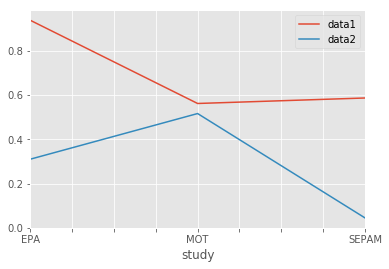

In [120]:
gr.mean().plot()

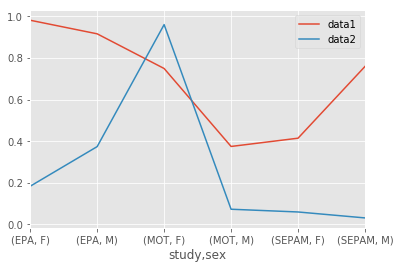

In [121]:
# When grouped on two columns
df.groupby(['study','sex']).mean().plot()

## Pivot tables

Grouping data along rows and columns.

    pd.pivot_table( dataframe, ... )
    
or

    dataframe.pivot_table( ... )
    

In [122]:
df.pivot_table( columns=['study'], index=['sex'], values=['data1'], aggfunc=np.mean )

data1                    
study       EPA       MOT     SEPAM
sex                                
F      0.981761  0.749669  0.414432
M      0.916431  0.374708  0.759576

In [123]:
# Adding an "All" row / column

df.pivot_table( index=['sex'], columns=['study'], margins=True, aggfunc=np.sum )

data1                                   data2                      \
study       EPA       MOT     SEPAM       All       EPA       MOT     SEPAM   
sex                                                                           
F      0.981761  0.749669  0.414432  2.145862  0.183383  0.960724  0.059558   
M      1.832861  0.374708  0.759576  2.967145  0.747968  0.072755  0.030975   
All    2.814623  1.124377  1.174008  5.113007  0.931351  1.033479  0.090533   

                 
study       All  
sex              
F      1.203666  
M      0.851698  
All    2.055364

## Example: Weather

In [124]:
data = pd.read_csv("weather_year.csv", parse_dates=['EDT'])

In [125]:
data.head(5)
#data.tail(5)

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-03-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-03-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-03-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-03-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-03-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


In [126]:
data.shape

(366, 23)

In [127]:
data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [128]:
# Rename the columns
data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

In [129]:
# Make the date the index of the dataframe.
data = data.set_index('date')
data.head()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,10,10,10,13,6,17.0,0.00,0,NaN,138
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,10,10,10,22,7,32.0,T,1,Rain,163
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,10,10,6,24,14,36.0,0.03,6,Rain,190
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,10,10,4,16,5,24.0,0.00,0,NaN,242
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,10,10,10,16,6,22.0,0.00,0,NaN,202


In [130]:
# We can now quickly select the data for December 2012
data['2012-12']

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-12-01,66,55,44,46,42,39,82,65,48,30.21,...,10,9,8,18,7,25.0,0.00,7,NaN,168
2012-12-02,63,60,56,59,54,47,97,76,55,30.10,...,10,8,4,23,11,31.0,0.16,8,Rain,216
2012-12-03,71,66,61,59,56,49,97,79,60,30.11,...,10,10,6,23,11,29.0,0.03,5,Rain,203
2012-12-04,65,51,37,58,49,37,93,75,56,30.24,...,10,8,1,22,8,30.0,0.09,7,Rain,250
2012-12-05,51,41,31,35,32,28,100,73,46,30.38,...,10,10,8,9,4,13.0,0.00,0,NaN,57
2012-12-06,50,40,29,43,34,26,89,71,52,30.22,...,10,10,8,10,6,13.0,0.00,4,NaN,146
2012-12-07,54,51,47,52,49,44,100,93,86,29.96,...,9,2,0,10,3,14.0,0.10,8,Fog-Rain,139
2012-12-08,52,49,46,52,46,39,100,91,86,30.01,...,10,6,2,10,4,13.0,T,8,Rain,338
2012-12-09,59,52,44,56,51,42,100,93,86,30.01,...,10,5,0,16,7,25.0,0.33,8,Fog-Rain,176


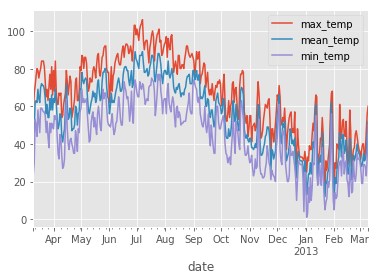

In [131]:
data[ ['max_temp','mean_temp','min_temp'] ].plot()

In [132]:
# Plot the temperatures in Celsius not Fahrenheit
def FtoC( t ):
    return (t - 32) * (5/9)

In [133]:
temp_C = data[ ['max_temp', 'mean_temp', 'min_temp'] ].applymap( FtoC )
temp_C.head()

,max_temp,mean_temp,min_temp
date,,,
2012-03-10,13.333333,4.444444,-4.444444
2012-03-11,19.444444,9.444444,-1.111111
2012-03-12,21.666667,16.666667,11.666667
2012-03-13,24.444444,17.222222,10.000000
2012-03-14,26.666667,16.666667,6.666667


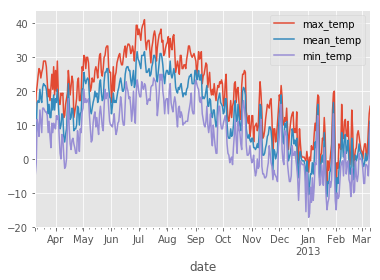

In [134]:
temp_C.plot()

In [135]:
# Let's make the graph clearer by taking the mean values per month.
# We can resample the data per month.

temp_C.resample('MS').mean()

,max_temp,mean_temp,min_temp
date,,,
2012-03-01,23.333333,16.540404,9.469697
2012-04-01,19.592593,12.907407,5.925926
2012-05-01,27.186380,20.465950,13.476703
2012-06-01,30.129630,22.518519,14.555556
2012-07-01,35.000000,27.526882,19.784946
2012-08-01,30.573477,22.724014,14.623656
2012-09-01,23.981481,18.037037,11.925926
2012-10-01,16.953405,11.577061,5.985663
2012-11-01,11.518519,4.981481,-1.777778


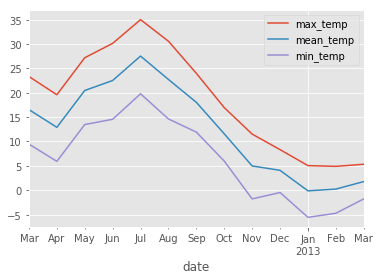

In [136]:
# Aggregatez the data per month
temp_C.resample('MS').mean().plot()

In [137]:
# Alternative with groupby on year and month

temp_C.groupby( [temp_C.index.year, temp_C.index.month] ).mean()

# Plotting
#temp_C.groupby( [temp_C.index.year, temp_C.index.month] ).mean().plot()

max_temp  mean_temp   min_temp
2012 3   23.333333  16.540404   9.469697
     4   19.592593  12.907407   5.925926
     5   27.186380  20.465950  13.476703
     6   30.129630  22.518519  14.555556
     7   35.000000  27.526882  19.784946
     8   30.573477  22.724014  14.623656
     9   23.981481  18.037037  11.925926
     10  16.953405  11.577061   5.985663
     11  11.518519   4.981481  -1.777778
     12   8.333333   4.086022  -0.465950
2013 1    5.053763  -0.125448  -5.555556
     2    4.900794   0.238095  -4.722222
     3    5.333333   1.777778  -1.777778

## Mathplotlib 

Drawing plots, barchart. Some interaction is possible too.

Documentation: 
  * http://matplotlib.org/
  * [Beginners Guide](http://matplotlib.org/users/beginner.html)
  * [Examples](http://matplotlib.org/users/screenshots.html)
  * [scipy-lectures](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
 
 
  

In [138]:
%matplotlib inline

import matplotlib.pyplot as plt

# Optional, use a nice style of graphs
plt.style.use('ggplot')


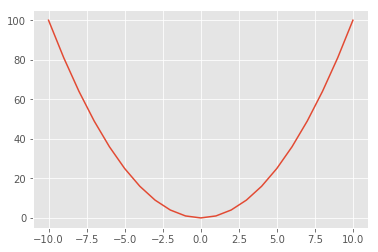

In [139]:
# plt.plot is the basic command
# plt.plot( X-axis, Y-axis, options... )

x = np.arange(-10,11)
y = x * x

plt.plot( x, y )

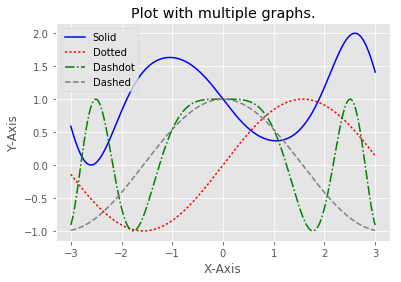

In [140]:
# Plotting multiple graphs in one plot

x = np.arange(-3,3,0.0001)

ya = np.sin(x-2*np.sin(x))+1

yb1 = np.sin(x)
yb2 = np.cos(x*x)

yc = np.cos(np.abs(x))

# Plot multiple graphs
plt.plot( x, ya, color='blue', linestyle='-', label='Solid')
plt.plot( x, yb1, color='red', linestyle=':', label ='Dotted')
plt.plot( x, yb2, color='green', linestyle='-.', label='Dashdot')
plt.plot( x, yc, color='grey', linestyle='--', label='Dashed')

# Show a legend
plt.legend()

# Plot labels for X and Y axis
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Plot a title
plt.title("Plot with multiple graphs.")